<a href="https://colab.research.google.com/github/baepigyu/AI-Deep-Learning-Class/blob/main/lec5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
train_data.shape

(404, 13)

In [ ]:
train_targets.shape

(404,)

In [ ]:
mean = train_data.mean(axis=0)
mean.shape

(13,)

In [ ]:
train_data -= mean
std = train_data.std(axis = 0)
train_data /=std
test_data -= mean
test_data /= std

In [ ]:

def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation = 'relu'),
        layers.Dense(64,activation = 'relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer = 'rmsprop',loss='mse',metrics = ['mae'])
    return model

In [ ]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [ ]:
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
(train_images,train_labels),_

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit()

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images_with_noise_channels.shape

(60000, 1568)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512,activation = 'relu'),
        layers.Dense(10,activation = 'relu')
    ])
    model.compile(optimizer = 'rmsprop',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model


model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 4ms/step - loss: inf - accuracy: 0.1500 - val_loss: inf - val_accuracy: 0.1692
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1672 - val_loss: inf - val_accuracy: 0.1692
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1675 - val_loss: inf - val_accuracy: 0.1692
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: inf - accuracy: 0.1677 - val_loss: inf - val_accuracy: 0.1692
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: inf - accuracy: 0.1678 - val_loss: inf - val_accuracy: 0.1692
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: inf - accuracy: 0.1664 - val_loss: inf - val_accuracy: 0.1692
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: inf - accuracy: 0.1674 - val_loss: inf - val_accuracy: 0.1692
Epoch 8/10
375/375 [============================

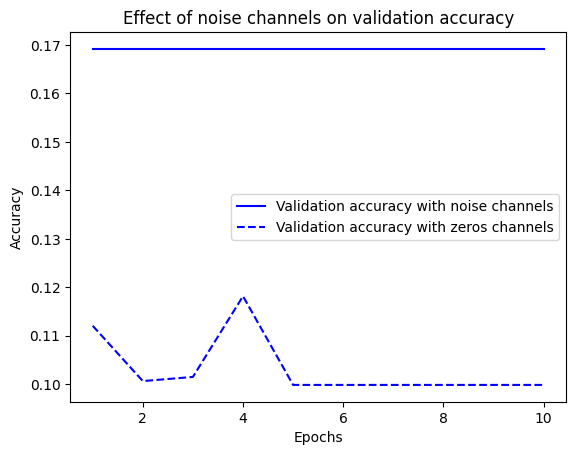

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
(train_images, train_labels), _ = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512,activation = 'relu'),
    layers.Dense(10, activation = 'relu'),
])

model.compile(optimizer ='rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, random_train_labels,
          epochs = 100,
          batch_size = 128,
          validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: inf - accuracy: 0.0986 - val_loss: 2.2852 - val_accuracy: 0.1002
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.0988 - val_loss: 2.2852 - val_accuracy: 0.1002
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.0977 - val_loss: 2.2852 - val_accuracy: 0.1002
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.0987 - val_loss: 2.2852 - val_accuracy: 0.1002
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: inf - accuracy: 0.0981 - val_loss: 2.2852 - val_accuracy: 0.1002
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.0983 - val_loss: 2.2852 - val_accuracy: 0.1002
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.0986 - val_loss: 2.2852 - val_accuracy: 0.1002
Epoch 8/100
375/375 

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.1077 - val_loss: 2.2871 - val_accuracy: 0.1118
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1119 - val_loss: 2.2852 - val_accuracy: 0.1107
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1117 - val_loss: 2.2969 - val_accuracy: 0.1093
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1120 - val_loss: 2.2852 - val_accuracy: 0.1108
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1129 - val_loss: 2.2871 - val_accuracy: 0.1109
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1135 - val_loss: 2.2910 - val_accuracy: 0.1040
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.1154 - val_loss: 2.3105 - val_accuracy: 0.1115
Epoch 8/10
375/375 [=======

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.0999 - val_loss: 2.3320 - val_accuracy: 0.0944
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1077 - val_loss: 2.3281 - val_accuracy: 0.1040
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1146 - val_loss: 2.3262 - val_accuracy: 0.1017
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1170 - val_loss: 2.3281 - val_accuracy: 0.1046
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1199 - val_loss: 2.3281 - val_accuracy: 0.1018
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1227 - val_loss: 2.3281 - val_accuracy: 0.0993
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1255 - val_loss: 2.3262 - val_accuracy: 0.1045
Epoch 8/20
375/375 [=======

In [ ]:
model = keras.Sequential([
    layers.Dense(96,activation = 'relu'),
    layers.Dense(96,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])
model.compile(op)

In [ ]:
(train_images,train_labels),_ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images/ 255

model = keras.Sequential([
    layers.Dense(512,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])
model.compile(optimizer = keras.optimizers.RMSprop(1.),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels,
          epochs = 10, batch_size = 128,
          validation_split = 0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0983 - val_loss: nan - val_accuracy: 0.0995
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0981 - val_loss: nan - val_accuracy: 0.0995
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0995
Epoch 8/10
375/375 [============================

In [ ]:
model = keras.Sequential([
    layers.Dense(16,activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(16,activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
history_dropout = model.fit(train_data,train_labels, epochs = 10, batch_size = 512, validation_split = 0.4)

Epoch 1/10
1/1 [==============================] - 1s 942ms/step - loss: -256.7500 - accuracy: 0.1322 - val_loss: -198.8750 - val_accuracy: 0.1173
Epoch 2/10
1/1 [==============================] - 0s 35ms/step - loss: -263.7500 - accuracy: 0.1281 - val_loss: -207.2500 - val_accuracy: 0.1173
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: -171.7500 - accuracy: 0.1116 - val_loss: -213.3750 - val_accuracy: 0.1173
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: -inf - accuracy: 0.1322 - val_loss: -219.8750 - val_accuracy: 0.1173
Epoch 5/10
1/1 [==============================] - 0s 33ms/step - loss: -247.7500 - accuracy: 0.1240 - val_loss: -224.7500 - val_accuracy: 0.1173
Epoch 6/10
1/1 [==============================] - 0s 34ms/step - loss: -250.1250 - accuracy: 0.1198 - val_loss: -229.1250 - val_accuracy: 0.1173
Epoch 7/10
1/1 [==============================] - 0s 32ms/step - loss: -236.5000 - accuracy: 0.1447 - val_loss: -233.5000 - val_accura

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer = regularizers.l2(0.002),activation = 'relu'),
    layers.Dense(16,
                 kernel_regularizer = regularizers.l2(0.002),activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer = 'rmsprop',
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(train_data,train_labels,
          epochs = 20, batch_size = 512, validation_split=0.4)


Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: inf - accuracy: 0.1157 - val_loss: inf - val_accuracy: 0.0679
Epoch 2/20
1/1 [==============================] - 0s 42ms/step - loss: inf - accuracy: 0.1157 - val_loss: inf - val_accuracy: 0.0679
Epoch 3/20
1/1 [==============================] - 0s 29ms/step - loss: inf - accuracy: 0.1157 - val_loss: inf - val_accuracy: 0.0679
Epoch 4/20
1/1 [==============================] - 0s 29ms/step - loss: inf - accuracy: 0.1157 - val_loss: inf - val_accuracy: 0.0679
Epoch 5/20
1/1 [==============================] - 0s 30ms/step - loss: inf - accuracy: 0.1157 - val_loss: inf - val_accuracy: 0.0679
Epoch 6/20
1/1 [==============================] - 0s 30ms/step - loss: inf - accuracy: 0.1157 - val_loss: inf - val_accuracy: 0.0679
Epoch 7/20
1/1 [==============================] - 0s 29ms/step - loss: inf - accuracy: 0.1157 - val_loss: inf - val_accuracy: 0.0679
Epoch 8/20
1/1 [==============================] - 0s 29ms/step - loss: 